## ch01/avg.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# naive implementation O(n^2)
np.random.seed(0)
rewards = []

for n in range(1, 11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)

print('---')

# incremental implementation O(n)
np.random.seed(0)
Q = 0

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425
---
0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


## ch01/bandit.py


这是一个**多臂老虎机（Multi-Armed Bandit）**问题的经典实现场景。

场景背景
想象你面前有10台老虎机，每台机器都有不同的中奖概率（但你不知道具体概率）。你的目标是通过有限的尝试次数，找出哪台机器的中奖率最高，并最大化总收益。



2236


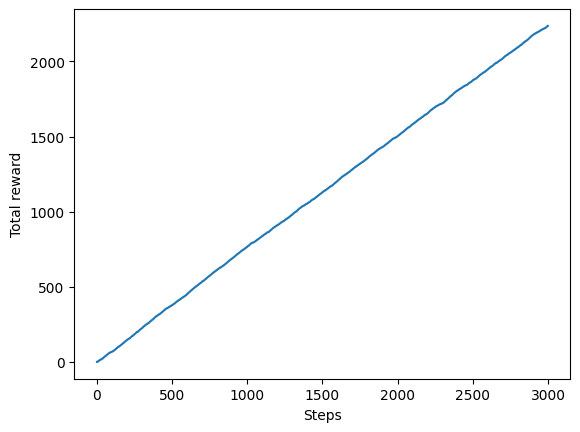

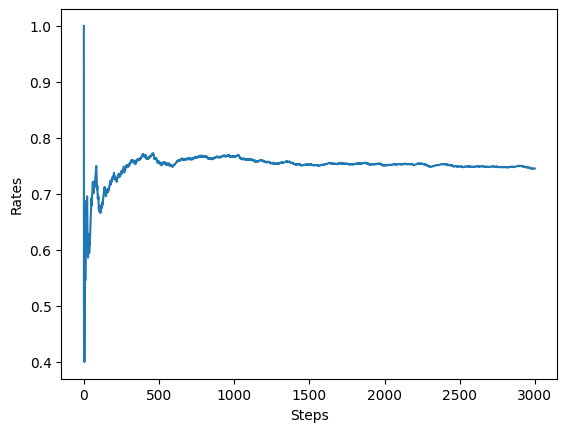

每个老虎机的真实中奖概率： [0.43971396 0.49864055 0.66143009 0.88875302 0.75066158 0.37846564
 0.6275987  0.60259062 0.88117881 0.19532017]
智能体估计的中奖概率： [0.44736842 0.52760736 0.67295597 0.89285714 0.70063694 0.38356164
 0.55319149 0.63358779 0.89335664 0.19259259]


In [9]:

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)  # 每台老虎机的真实中奖概率

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1 # 中奖
        else:
            return 0 # 未中奖


class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon # 探索率
        self.Qs = np.zeros(action_size) # 估计的每台机器的(平均)价值
        self.ns = np.zeros(action_size) # 每台机器被尝试的次数

    def update(self, action, reward):
        self.ns[action] += 1 # 尝试次数
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action] # 增量(平均奖励)

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)


steps = 3000

bandit = Bandit(arms=10)
agent = Agent(epsilon = 0.5)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

# 累计奖励随时间变化
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# 平均累计随时间变化
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

print("每个老虎机的真实中奖概率：",bandit.rates)
print("智能体估计的中奖概率：",agent.Qs)

## ch01/bandit_avg.py

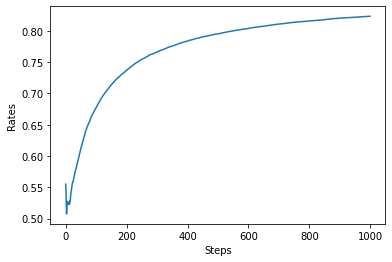

In [3]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))  # (2000, 1000)

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## ch01/non_stationary.py

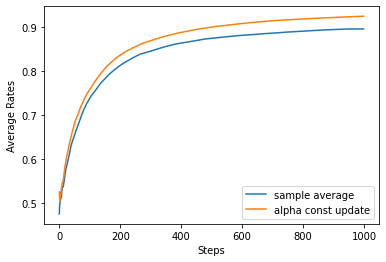

In [4]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)  # Add noise
        if rate > np.random.rand():
            return 1
        else:
            return 0


class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)


runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ['sample average', 'alpha const update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# plot
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()